In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.16.1


In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [5]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
# Horsepower column has 6 null values
dataset = dataset.dropna()

In [8]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [9]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


# Sklearn Implementation

In [10]:
df = dataset.copy()
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


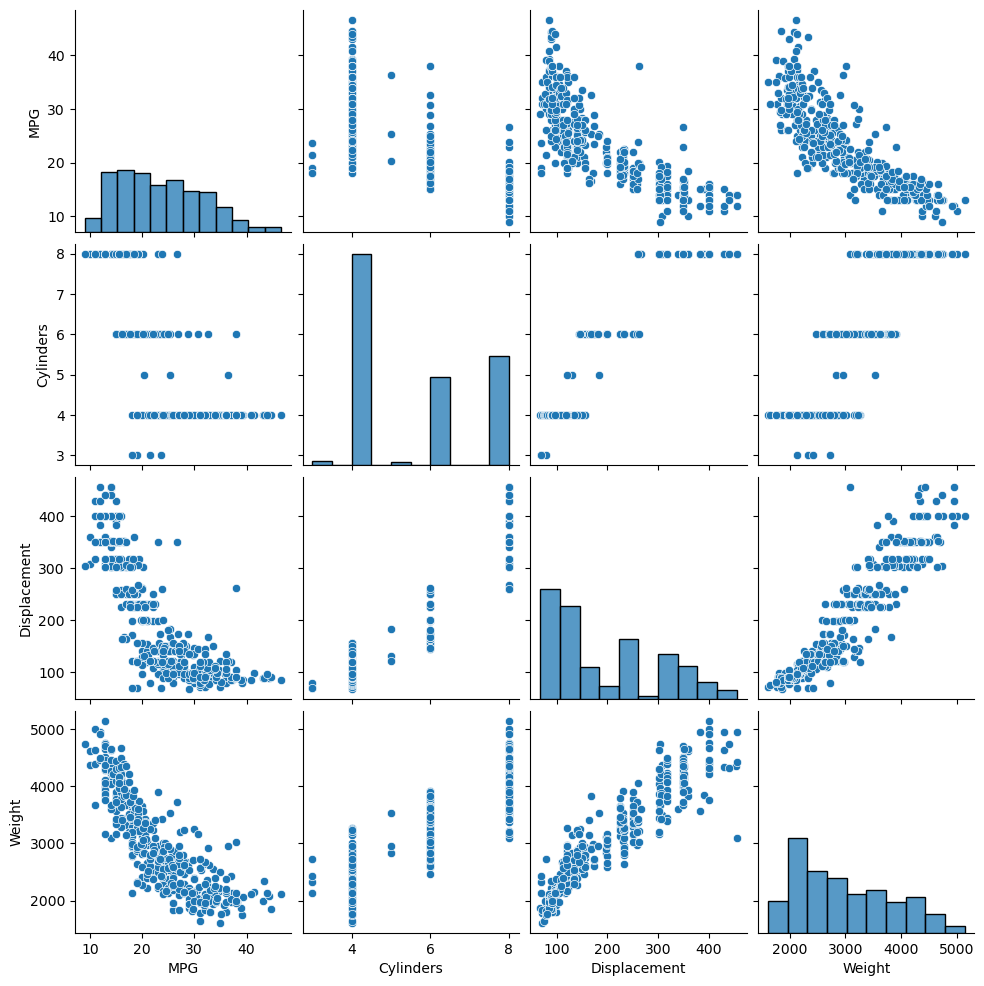

In [11]:
sns.pairplot(df[['MPG', 'Cylinders', 'Displacement', 'Weight']])

<Axes: >

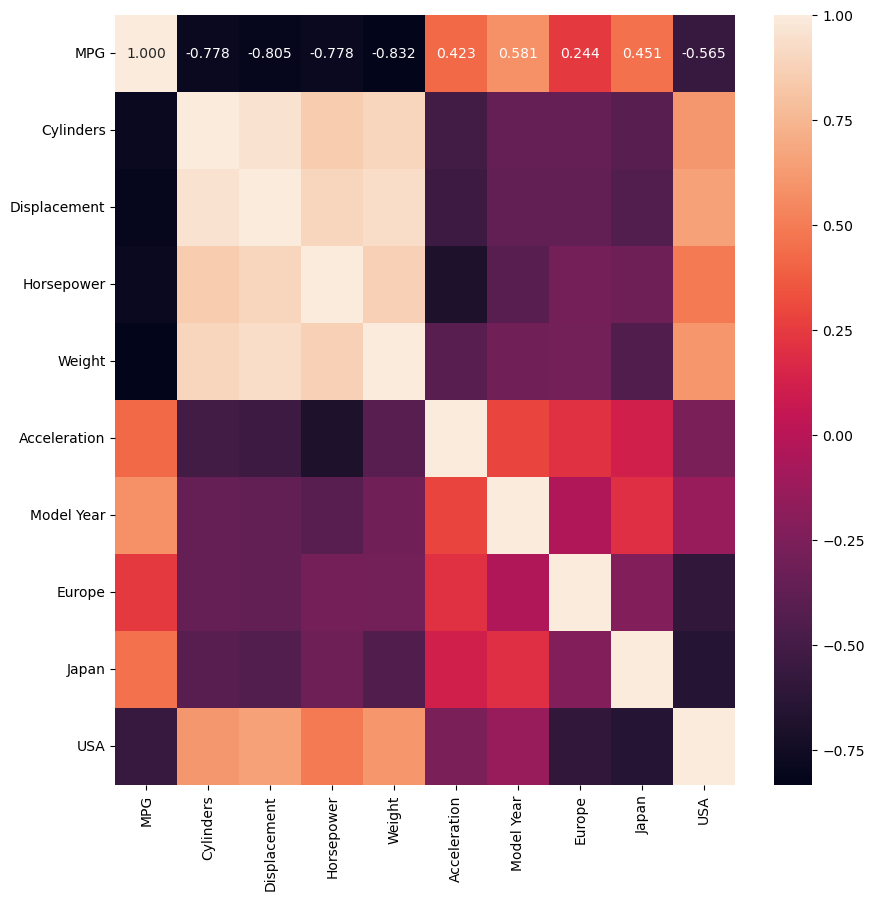

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".03f")

In [13]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')

In [14]:
X = df[['Cylinders', 'Displacement', 'Horsepower', 'Weight']]
y = df["MPG"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Simple Linear Regression (multiple inputs)

In [16]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(x_test_scaled)

In [20]:
def error_metrics(model, y_test, y_pred):
    error_metrics = {
        "mean_squared_error": mean_squared_error(y_test, y_pred),
        "mean_absolute_error": mean_absolute_error(y_test, y_pred),
        "r2_score": r2_score(y_test, y_pred)
    }
    print(model, error_metrics)

In [21]:
error_metrics("LinearRegression Error metrics: \n", y_test, y_pred)

LinearRegression Error metrics: 
 {'mean_squared_error': 27.437553672010917, 'mean_absolute_error': 3.9869749343065113, 'r2_score': 0.6341946168337007}


# Seaborn lmplot

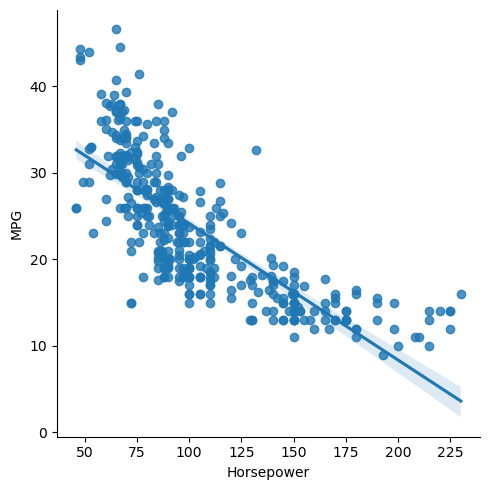

In [22]:
sns.lmplot(
    data=df,
    x='Horsepower',
    y="MPG"
)

# Seaborn regplot

<Axes: xlabel='Horsepower', ylabel='MPG'>

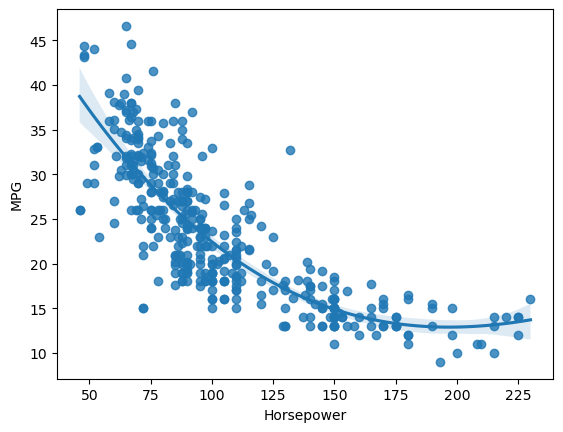

In [23]:
sns.regplot(
    data=df,
    x='Horsepower',
    y="MPG",
    order=3
)

# Polynomial Regression (Pipeline)

In [24]:
pipe = Pipeline([("Scaler", StandardScaler()), ("PolynomialFeatures(degree=2)", PolynomialFeatures(degree=2)), ("LineaRegression", LinearRegression())])

In [25]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('PolynomialFeatures(degree=2)', PolynomialFeatures()),
                ('LineaRegression', LinearRegression())])

In [26]:
y_pred = pipe.predict(x_test)

In [27]:
error_metrics("Polynomial Regression (degree=2) Error metrics: \n", y_test, y_pred)

Polynomial Regression (degree=2) Error metrics: 
 {'mean_squared_error': 22.459894884299636, 'mean_absolute_error': 3.495482687533871, 'r2_score': 0.7005582001865154}


# DecisionTreeRegressor

In [28]:
estimator = DecisionTreeRegressor()
param_grid = {
    "max_depth": [2,5,10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [29]:
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=4)

In [30]:
grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [31]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10)

In [32]:
grid.best_score_

0.7415135957257808

In [33]:
dt = grid.best_estimator_

In [34]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10)

In [35]:
y_pred = dt.predict(x_test)

In [36]:
error_metrics("DecisionTreeRegressor Error metrics: \n", y_test, y_pred)

DecisionTreeRegressor Error metrics: 
 {'mean_squared_error': 24.262674740410638, 'mean_absolute_error': 3.4699034765431094, 'r2_score': 0.676523018919539}


# RandomForestRegressor

In [37]:
estimator = RandomForestRegressor()
param_grid = {
    "max_depth": [2,5,10],
    "n_estimators": [50, 100]
}

In [38]:
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=4)

In [39]:
grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 10], 'n_estimators': [50, 100]})

In [40]:
grid.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=50)

In [41]:
grid.best_score_

0.7639109278998792

In [42]:
rf = grid.best_estimator_

In [43]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50)

In [44]:
y_pred = rf.predict(x_test)

In [45]:
error_metrics("RandomForestRegressor Error metrics: \n", y_test, y_pred)

RandomForestRegressor Error metrics: 
 {'mean_squared_error': 18.155475014048648, 'mean_absolute_error': 3.008490139551911, 'r2_score': 0.75794596801627}


# SVR

In [46]:
svr = SVR(kernel="rbf", C=1, verbose=1)

In [47]:
svr.fit(x_train_scaled, y_train)

[LibSVM]

SVR(C=1, verbose=1)

In [48]:
y_pred = svr.predict(x_test_scaled)

In [49]:
error_metrics("SVR kernal='rbf' Error metrics: \n", y_test, y_pred)

SVR kernal='rbf' Error metrics: 
 {'mean_squared_error': 21.956614642131104, 'mean_absolute_error': 3.3533073693677147, 'r2_score': 0.707268077605882}


In [50]:
svr = SVR(kernel="poly", C=1, verbose=1)

In [51]:
svr.fit(x_train_scaled, y_train)

[LibSVM]

SVR(C=1, kernel='poly', verbose=1)

In [52]:
y_pred = svr.predict(x_test_scaled)

In [53]:
error_metrics("SVR kernal='poly' Error metrics: \n", y_test, y_pred)

SVR kernal='poly' Error metrics: 
 {'mean_squared_error': 40.363993237806, 'mean_absolute_error': 4.800469702575086, 'r2_score': 0.4618555943804965}


# Tensorflow Implementation

In [54]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

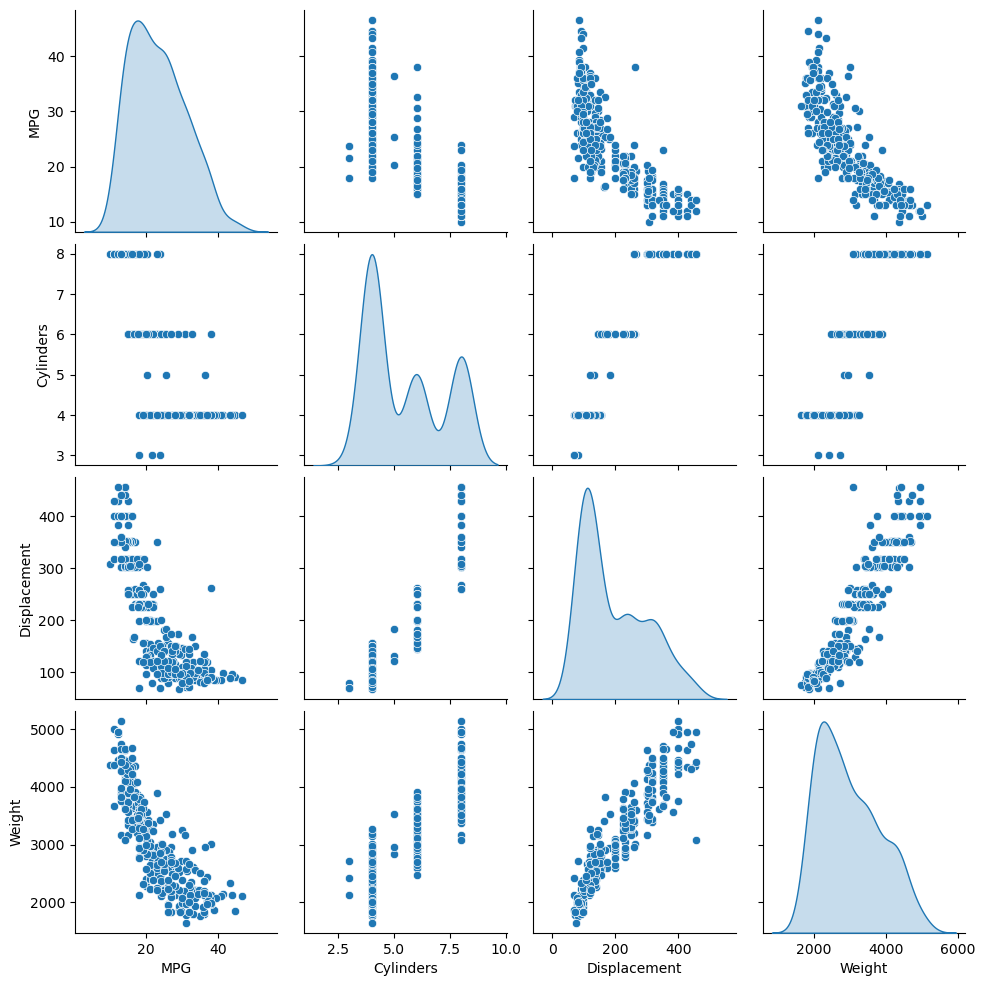

In [55]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [56]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000


In [57]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

# Normalization
- This layer is useful for standardizing the data, ensuring that the mean of the data is zero and the variance is one.

In [58]:
normalizer = tf.keras.layers.Normalization(axis=-1)

- fit the preprocessing layer to the data by calling Normalization.adapt()

In [59]:
normalizer.adapt(np.array(train_features))

In [60]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


# Regression (single input)

In [61]:
horsepower = np.array(train_features['Horsepower']) # single input feature

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [62]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [63]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [64]:
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [65]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.817919,4.154903,95
96,3.804932,4.175152,96
97,3.804613,4.202085,97
98,3.803347,4.197895,98
99,3.801812,4.176584,99


In [66]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

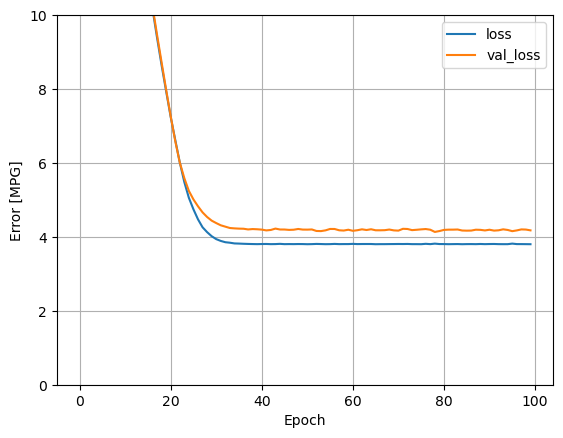

In [67]:
plot_loss(history)

In [68]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0
    )

In [69]:
test_results

{'horsepower_model': 3.6487951278686523}

In [70]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [71]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

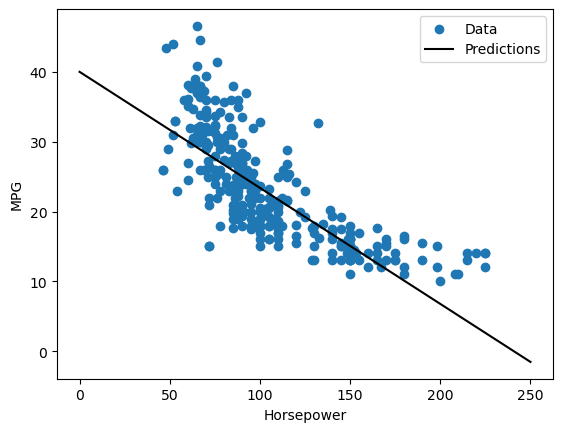

In [72]:
plot_horsepower(x, y)

# Regression (multiple inputs)

In [73]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [74]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [75]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

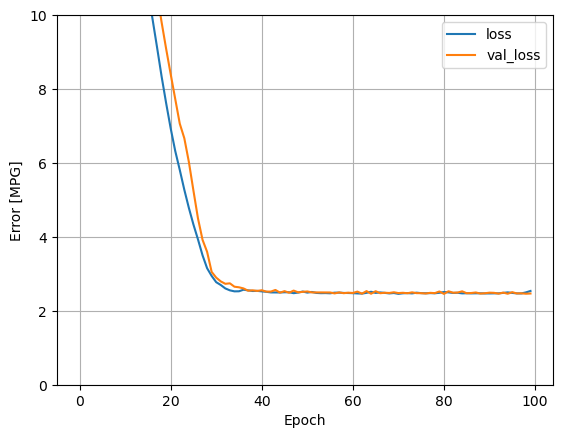

In [76]:
plot_loss(history)

In [77]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [78]:
test_results

{'horsepower_model': 3.6487951278686523, 'linear_model': 2.4962666034698486}

# Regression with Deep Neural Networks (Single Input)

In [79]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [80]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [81]:
dnn_horsepower_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [82]:
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

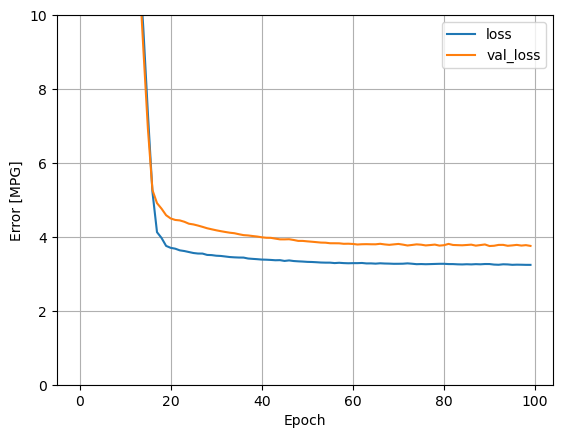

In [83]:
plot_loss(history)

In [84]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


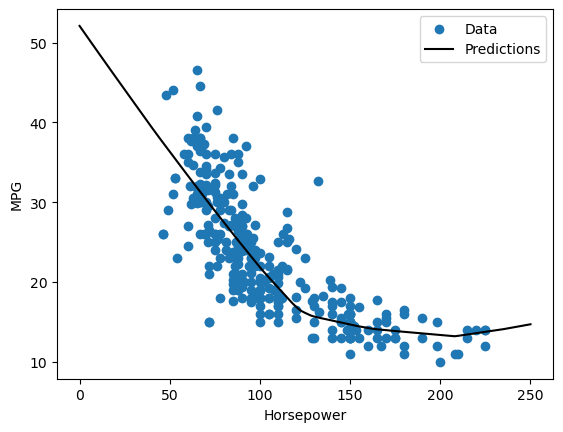

In [85]:
plot_horsepower(x, y)

In [86]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

# Regression with Deep Neural Networks (multiple inputs)

In [87]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 9)              │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [88]:
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

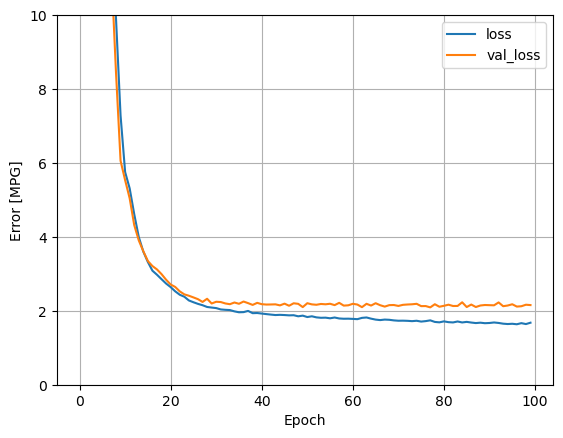

In [89]:
plot_loss(history)

In [90]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [91]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.648795
linear_model,2.496267
dnn_horsepower_model,2.892963
dnn_model,1.640985


In [92]:
dnn_model.save('dnn_model.keras')

In [93]:
reloaded = tf.keras.models.load_model('dnn_model.keras')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [94]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.648795
linear_model,2.496267
dnn_horsepower_model,2.892963
dnn_model,1.640985
reloaded,1.640985
